In [181]:
import pandas as pd

In [182]:
dataframe1 = pd.read_csv('C:/classisificatn and regressin/daily-total-female-births-CA.csv',header=0)

In [183]:
dataframe1.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [184]:
dataframe1['date'].dtype

dtype('O')

In [185]:
dataframe2=pd.read_csv('C:/classisificatn and regressin/daily-total-female-births-CA.csv',header=0,parse_dates=[0])

In [186]:
dataframe2['date'].dtype

dtype('<M8[ns]')

In [187]:
dataframe2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [188]:
my_series=pd.read_csv('C:/classisificatn and regressin/daily-total-female-births-CA.csv',header=0,parse_dates=[0],index_col=[0])

In [189]:
my_series.head()



,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [190]:
my_series.shape

(365, 1)

In [191]:
dataframe2.shape

(365, 2)

In [192]:
dataframe1.shape

(365, 2)

In [193]:
my_series.head(10)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


In [194]:
print(my_series.index)



DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='date', length=365, freq=None)


In [195]:
dataframe2[(dataframe2['date']>='1959-01-01')&(dataframe2['date']<='1959-01-21')]


,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [196]:
dataframe2.describe()


,date,births
count,365,365.000000
mean,1959-07-02 00:00:00,41.980822
min,1959-01-01 00:00:00,23.000000
25%,1959-04-02 00:00:00,37.000000
50%,1959-07-02 00:00:00,42.000000
75%,1959-10-01 00:00:00,46.000000
max,1959-12-31 00:00:00,73.000000
std,NaN,7.348257


In [197]:
myfeatures =dataframe2.copy()

In [198]:
myfeatures['year']=dataframe2['date'].dt.year

In [199]:
myfeatures['month']=dataframe2['date'].dt.month

In [200]:
myfeatures['day']=dataframe2['date'].dt.day

In [201]:
myfeatures.head(7)

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5
5,1959-01-06,29,1959,1,6
6,1959-01-07,45,1959,1,7


In [202]:
myfeatures['lag2']=dataframe2['births'].shift(2)

In [203]:
myfeatures['lagyear']=dataframe2['births'].shift(365)

In [204]:
myfeatures.head(7)

,date,births,year,month,day,lag2,lagyear
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,NaN
2,1959-01-03,30,1959,1,3,35.0,NaN
3,1959-01-04,31,1959,1,4,32.0,NaN
4,1959-01-05,44,1959,1,5,30.0,NaN
5,1959-01-06,29,1959,1,6,31.0,NaN
6,1959-01-07,45,1959,1,7,44.0,NaN


In [205]:
myfeatures['Mean_Roll']=dataframe2['births'].rolling(window=2).mean()

In [206]:
myfeatures['Max_Roll']=dataframe2['births'].rolling(window=4).max()

In [207]:
myfeatures.head(7)

,date,births,year,month,day,lag2,lagyear,Mean_Roll,Max_Roll
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,NaN,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,35.0,NaN,31.0,NaN
3,1959-01-04,31,1959,1,4,32.0,NaN,30.5,35.0
4,1959-01-05,44,1959,1,5,30.0,NaN,37.5,44.0
5,1959-01-06,29,1959,1,6,31.0,NaN,36.5,44.0
6,1959-01-07,45,1959,1,7,44.0,NaN,37.0,45.0


In [208]:
myfeatures['Max_Expand']=dataframe2['births'].expanding().max()

In [209]:
myfeatures.head(7)

,date,births,year,month,day,lag2,lagyear,Mean_Roll,Max_Roll,Max_Expand
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,NaN,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,35.0,NaN,31.0,NaN,35.0
3,1959-01-04,31,1959,1,4,32.0,NaN,30.5,35.0,35.0
4,1959-01-05,44,1959,1,5,30.0,NaN,37.5,44.0,44.0
5,1959-01-06,29,1959,1,6,31.0,NaN,36.5,44.0,44.0
6,1959-01-07,45,1959,1,7,44.0,NaN,37.0,45.0,45.0


In [210]:
from matplotlib import pyplot as plt
%matplotlib inline

In [211]:
newdata_df=dataframe2.copy()

In [212]:
newdata_df.head(10)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


<Axes: >

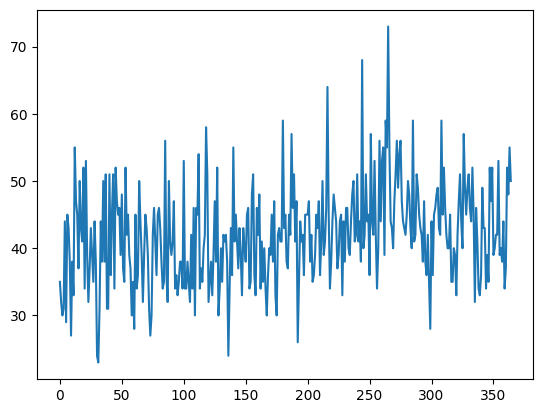

In [213]:
newdata_df['births'].plot()

In [214]:
newdata_df.index=newdata_df['date']

In [215]:
newdata_df2=newdata_df[(newdata_df['date']>='1959-01-01')&(newdata_df['date']<='1959-01-10')].copy()

In [216]:
newdata_df2

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38


<Axes: xlabel='date'>

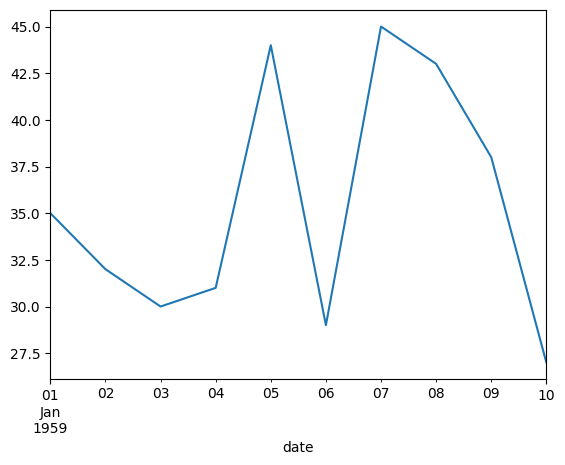

In [217]:
newdata_df2['births'].plot()

In [218]:
import seaborn as sns

<Axes: ylabel='births'>

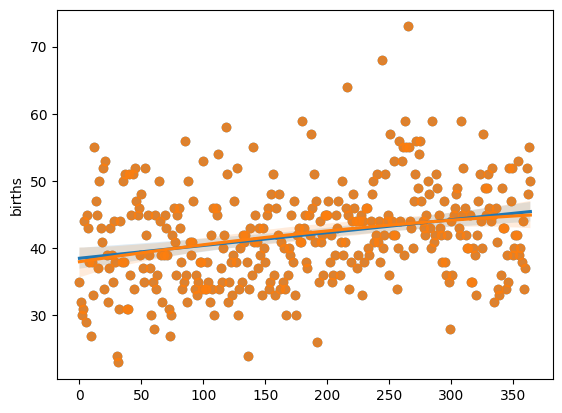

In [219]:
sns.regplot(x=dataframe2.index.values , y=dataframe2['births'])
sns.regplot(x=dataframe2.index.values , y=dataframe2['births'],order=2)

In [220]:
newmiles_df=pd.read_csv('C:/classisificatn and regressin/us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [221]:
newmiles_df.head(10)

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
5,1963-06-01,9644
6,1963-07-01,10466
7,1963-08-01,10748
8,1963-09-01,9963
9,1963-10-01,8194


<Axes: >

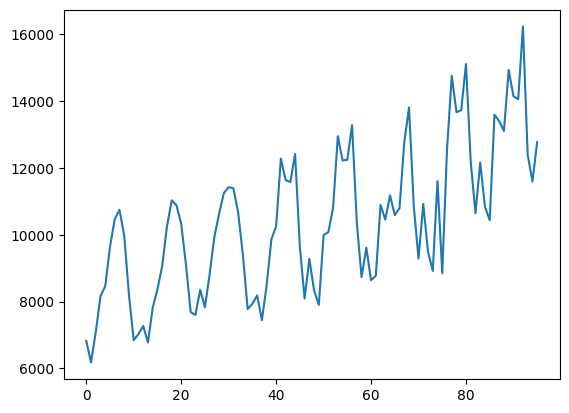

In [222]:
newmiles_df['MilesMM'].plot()


<Axes: ylabel='MilesMM'>

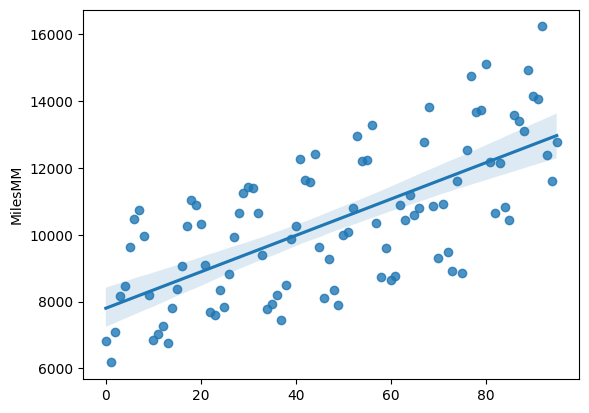

In [224]:
sns.regplot(x=newmiles_df.index.values,y=newmiles_df['MilesMM'])


In [226]:
newmiles_df.index=newmiles_df['Month']

<Axes: xlabel='Month'>

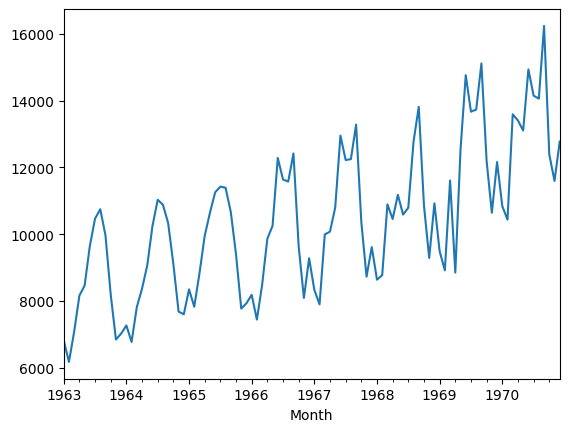

In [227]:
newmiles_df['MilesMM'].plot()

In [228]:
newmiles_df['year']=newmiles_df['Month'].dt.year#we use dt when creating a new clmn

In [229]:
newmiles_df.head()

,Month,MilesMM,year
Month,,,
1963-01-01,1963-01-01,6827,1963
1963-02-01,1963-02-01,6178,1963
1963-03-01,1963-03-01,7084,1963
1963-04-01,1963-04-01,8162,1963
1963-05-01,1963-05-01,8462,1963


In [235]:
newmiles_df.groupby('year')['MilesMM'].mean()#if i want to get the mean f each year

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<Axes: xlabel='year'>

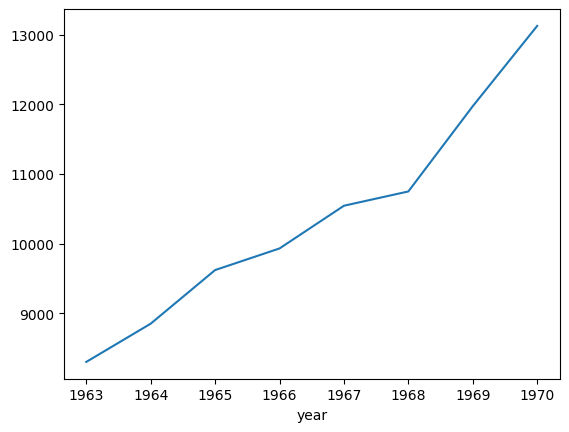

In [236]:
newmiles_df.groupby('year')['MilesMM'].mean().plot()

In [237]:
newmiles_df['lag']=newmiles_df['MilesMM'].shift(1)#we want t check lag f MilesMM

In [238]:
newmiles_df.head()

,Month,MilesMM,year,mean,lag
Month,,,,,
1963-01-01,1963-01-01,6827,1963,NaN,NaN
1963-02-01,1963-02-01,6178,1963,NaN,6827.0
1963-03-01,1963-03-01,7084,1963,NaN,6178.0
1963-04-01,1963-04-01,8162,1963,NaN,7084.0
1963-05-01,1963-05-01,8462,1963,NaN,8162.0


<Axes: xlabel='lag', ylabel='MilesMM'>

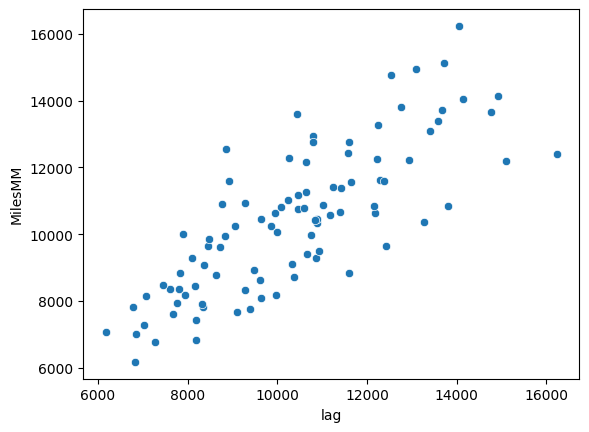

In [240]:
sns.scatterplot(x=newmiles_df['lag'] , y=newmiles_df['MilesMM'])

In [242]:
from pandas.plotting import lag_plot 

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

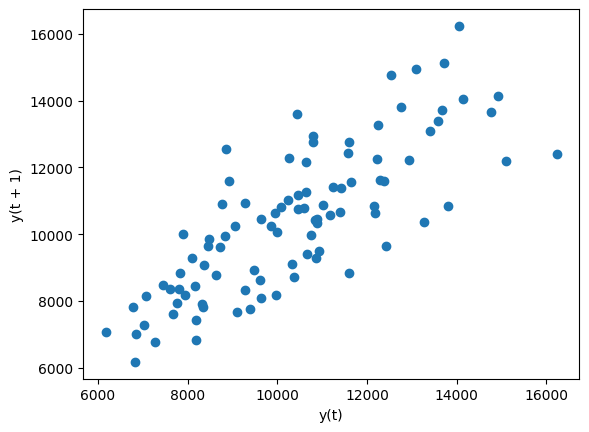

In [244]:
lag_plot(newmiles_df['MilesMM'])

In [245]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

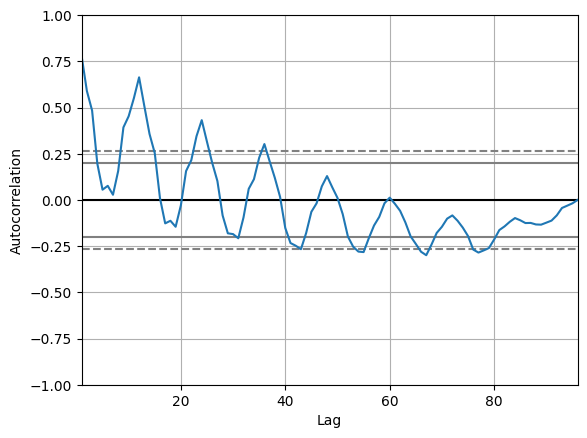

In [246]:
 autocorrelation_plot(newmiles_df['MilesMM'])